In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_table('/content/drive/My Drive/Hy_allchain_information.txt', sep='\s+',header=None)

In [ ]:
df=df.drop(286,axis=1)
df=df.drop(0,axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,276,277,278,279,280,281,282,283,284,285
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,7,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,2,7,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,1,1,2,7,0,0,0,0
4,1,1,0,2,0,1,0,0,0,0,...,0,0,1,1,2,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14827,170,190,191,22,175,180,200,168,186,184,...,179,201,195,214,192,193,170,205,155,190
14828,170,190,191,22,175,180,200,168,186,184,...,179,201,195,214,192,193,170,205,155,190
14829,170,190,191,22,175,180,200,168,186,184,...,179,201,195,214,192,193,170,205,155,190
14830,170,190,191,22,175,180,200,168,186,184,...,179,201,195,214,192,193,170,205,155,190


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
dataset = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.85)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

In [ ]:
def create_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset)-seq_length):
        seq = dataset[i:(i+seq_length)]
        X.append(seq)
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)
seq_length = 50
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
np.shape(X_test)

(2175, 50, 285)

In [ ]:
# Build and train LSTM model
from keras import optimizers
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 285)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(285))
model.compile(loss="mean_squared_error", optimizer="Adam")
model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
197/197 [==============================] - 30s 123ms/step - loss: 0.0457
Epoch 2/25
197/197 [==============================] - 19s 94ms/step - loss: 7.1974e-04
Epoch 3/25
197/197 [==============================] - 18s 90ms/step - loss: 5.5214e-04
Epoch 4/25
197/197 [==============================] - 17s 89ms/step - loss: 3.3840e-04
Epoch 5/25
197/197 [==============================] - 16s 82ms/step - loss: 3.7315e-04
Epoch 6/25
197/197 [==============================] - 17s 84ms/step - loss: 2.7166e-04
Epoch 7/25
197/197 [==============================] - 17s 87ms/step - loss: 2.4524e-04
Epoch 8/25
197/197 [==============================] - 17s 86ms/step - loss: 2.5448e-04
Epoch 9/25
197/197 [==============================] - 17s 88ms/step - loss: 2.2154e-04
Epoch 10/25
197/197 [==============================] - 19s 98ms/step - loss: 1.9329e-04
Epoch 11/25
197/197 [==============================] - 17s 85ms/step - loss: 1.6970e-04
Epoch 12/25
197/197 [=======================

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
np.shape(y_pred)

68/68 [==============================] - 2s 18ms/step


(2175, 285)

In [ ]:
y_pred

array([[161.50348, 178.68398, 178.11058, ..., 197.4196 , 145.74681,
        178.87201],
       [161.50517, 178.6863 , 178.11386, ..., 197.42249, 145.74918,
        178.87398],
       [161.50696, 178.6887 , 178.1173 , ..., 197.4253 , 145.75179,
        178.87607],
       ...,
       [162.92151, 180.60185, 180.83026, ..., 199.27885, 147.96678,
        180.62411],
       [162.92188, 180.60242, 180.83104, ..., 199.27925, 147.96748,
        180.62463],
       [162.9223 , 180.60294, 180.83183, ..., 199.27968, 147.96814,
        180.62517]], dtype=float32)

In [ ]:
y_pred=np.round(y_pred)

In [ ]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[164., 180., 181., ..., 198., 147., 182.],
       [164., 180., 181., ..., 198., 147., 182.],
       [164., 180., 181., ..., 198., 147., 182.],
       ...,
       [170., 190., 191., ..., 205., 155., 190.],
       [170., 190., 191., ..., 205., 155., 190.],
       [170., 190., 191., ..., 205., 155., 190.]])

In [ ]:
Mn_pred=np.sum(y_pred, axis=1) / 285
Mn_real=np.sum(y_test, axis=1) / 285

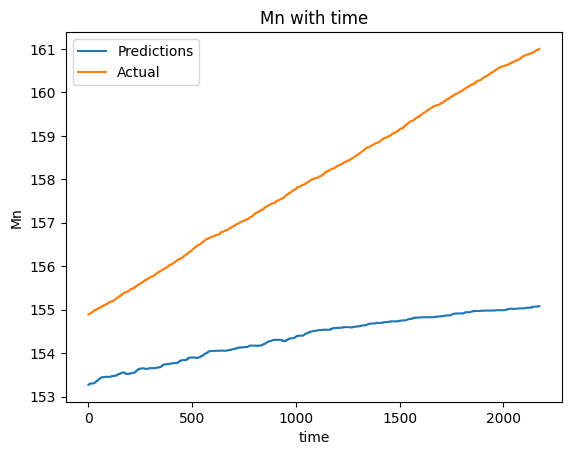

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Mn_pred, label='Predictions')
plt.plot(Mn_real, label='Actual')
plt.title('Mn with time')
plt.xlabel('time')
plt.ylabel('Mn')
plt.legend()
plt.show()

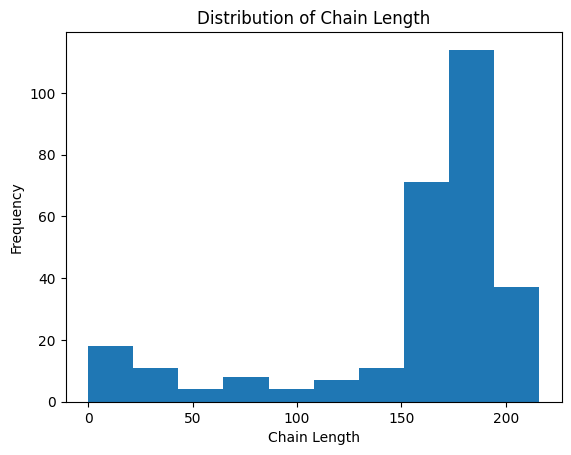

In [ ]:
plt.hist(y_test[0], bins=10)
plt.title('Distribution of Chain Length')
plt.xlabel('Chain Length')
plt.ylabel('Frequency')
plt.show()

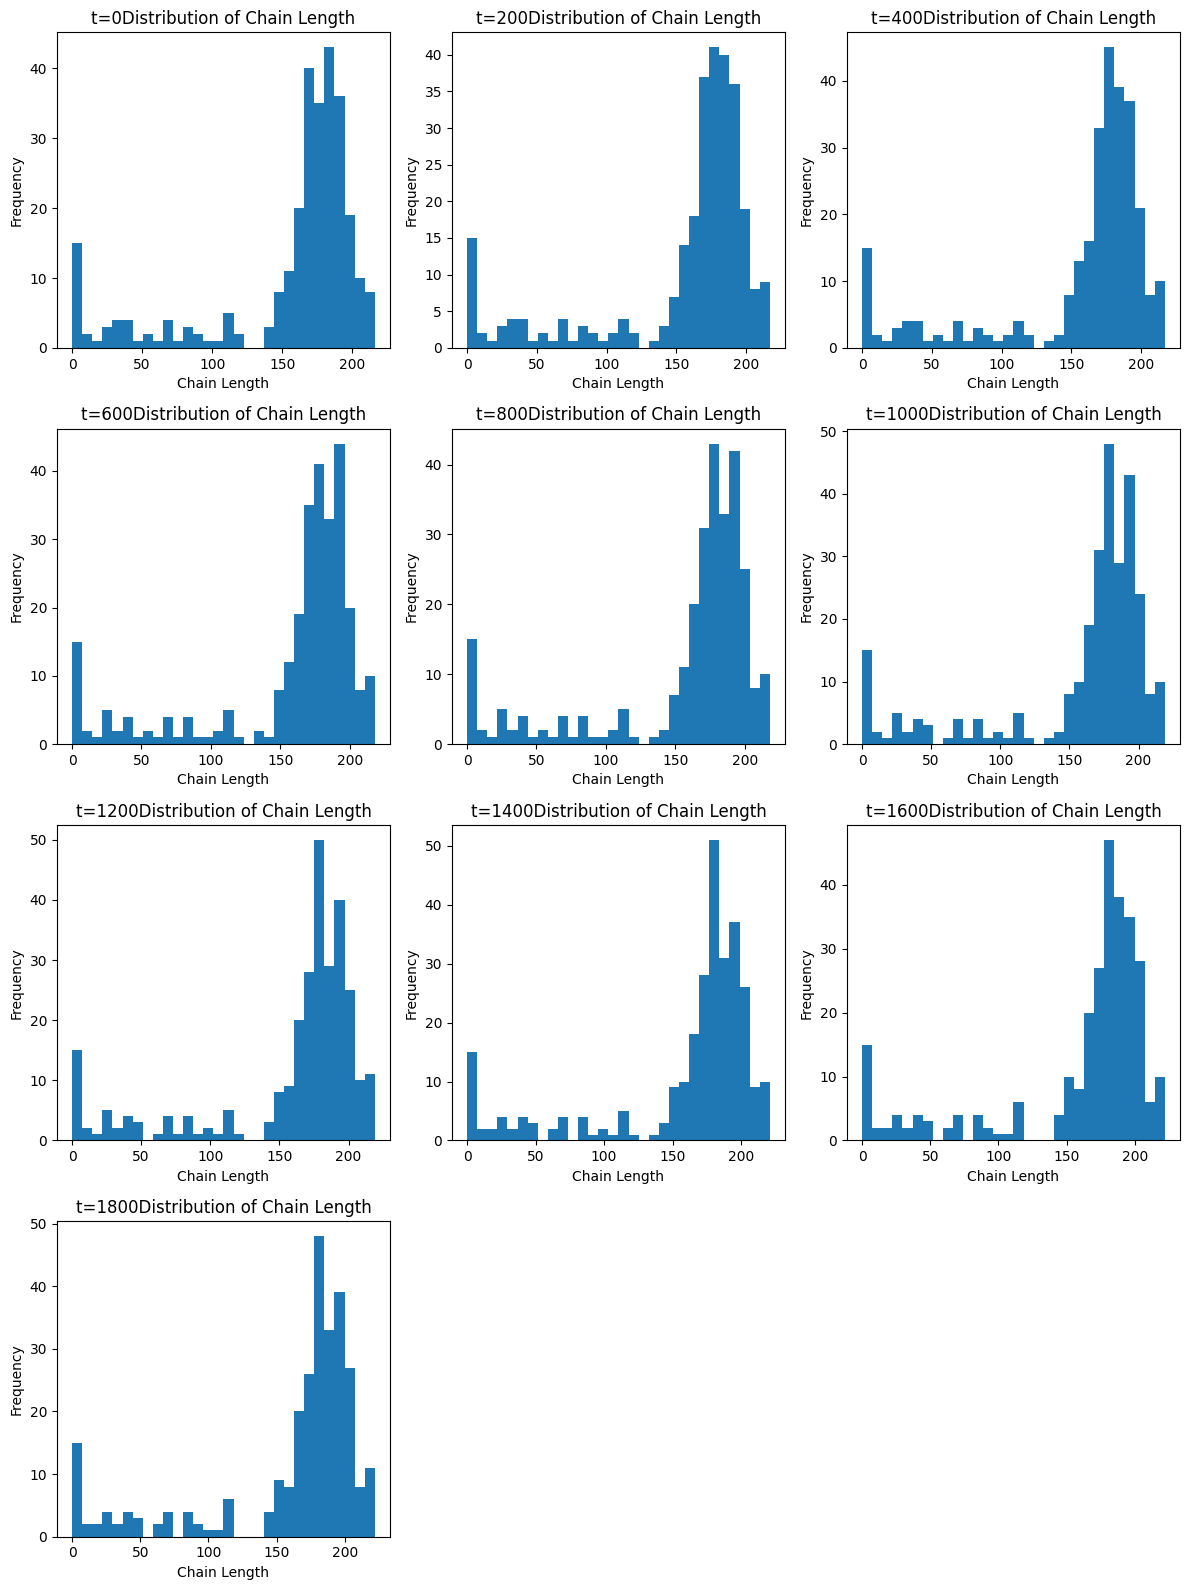

In [ ]:
import matplotlib.pyplot as plt

# 10个数组
arrays = [y_test[0], y_test[200], y_test[400], y_test[600], y_test[800], y_test[1000], y_test[1200], y_test[1400], y_test[1600], y_test[1800]]

# 创建子图
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))

# 循环绘制直方图
for i, ax in enumerate(axs.flatten()):
    if i < len(arrays):
        ax.hist(arrays[i], bins=30)
        ax.set_title('t={}Distribution of Chain Length'.format(i*200))
        #ax.set_title('Distribution of Chain Length')
        ax.set_xlabel('Chain Length')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

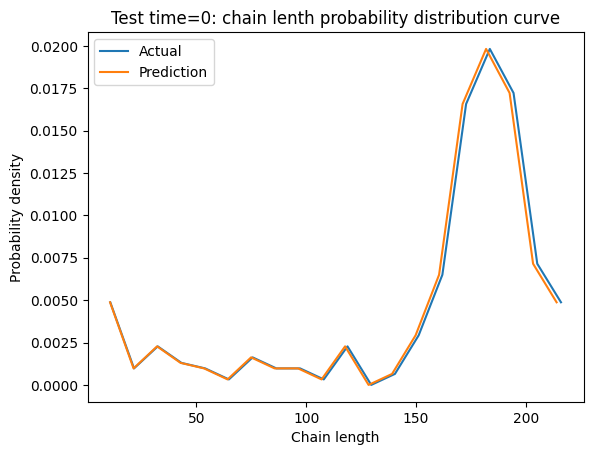

In [ ]:
counts, bin_edges = np.histogram(y_test[0], bins=20, density=True)
counts_pred, bin_edges_pred = np.histogram(y_pred[0], bins=20, density=True)
plt.plot(bin_edges[1:], counts,label='Actual')
plt.plot(bin_edges_pred[1:], counts,label='Prediction')
plt.xlabel('Chain length')
plt.ylabel('Probability density')
plt.title('Test time=0: chain lenth probability distribution curve')
plt.legend()
plt.show()

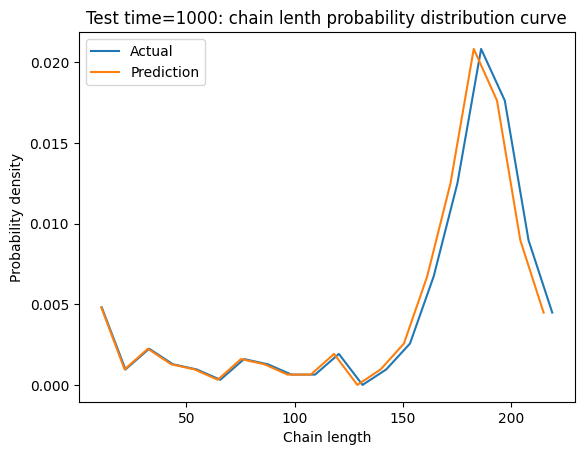

In [ ]:
counts, bin_edges = np.histogram(y_test[1000], bins=20, density=True)
counts_pred, bin_edges_pred = np.histogram(y_pred[1000], bins=20, density=True)
plt.plot(bin_edges[1:], counts,label='Actual')
plt.plot(bin_edges_pred[1:], counts,label='Prediction')
plt.xlabel('Chain length')
plt.ylabel('Probability density')
plt.title('Test time=1000: chain lenth probability distribution curve')
plt.legend()
plt.show()

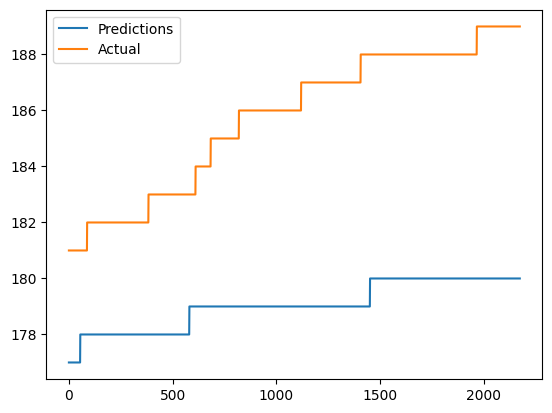

In [ ]:
import matplotlib.pyplot as plt
plt.plot([row[89] for row in y_pred], label='Predictions')
plt.plot([row[89] for row in y_test], label='Actual')
plt.legend()
plt.show()

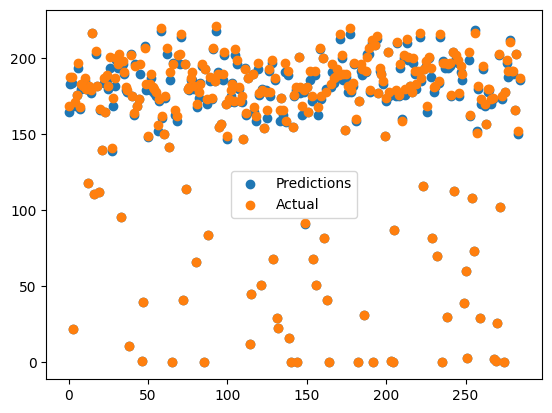

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred[0])), y_pred[0], label='Predictions')
plt.scatter(range(len(y_test[0])), y_test[0], label='Actual')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred[200])), y_pred[1000], label='Predictions')
plt.scatter(range(len(y_test[200])), y_test[1000], label='Actual')
plt.legend()
plt.show()

IndexError: ignored

In [ ]:
y_pred[0]

array([161., 177., 175.,  22., 164., 171., 183., 163., 171., 177., 175.,
       176., 118., 168., 172., 211., 111., 195., 177., 112., 159., 133.,
       175., 160., 179., 174., 180., 132., 158., 174., 184., 191., 193.,
        96., 192., 178., 171., 173.,  11., 198., 173., 156., 185., 163.,
       169., 179.,   1.,  40., 196., 172., 142., 165., 183., 175., 171.,
       169., 144., 164., 208., 156., 149., 164., 195., 143., 177.,   0.,
       190., 158., 153., 187., 187., 207.,  41., 189., 115., 173., 173.,
       183., 181., 177.,  67., 162., 167., 178., 184.,  -0., 188., 166.,
        84., 173., 165., 200., 180., 208., 175., 149., 152., 176., 193.,
       167., 142., 166., 168., 180., 165., 193., 187., 175., 166., 163.,
       148., 185., 156., 182.,  12.,  45., 185., 156., 153., 182., 168.,
        51., 179., 150., 175., 155., 185., 172., 190.,  68., 180.,  29.,
        23., 153., 163., 158., 183., 160., 180.,  16.,  -0., 154., 169.,
       174.,   0., 195., 170., 156., 172.,  92., 17